In [6]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

In [7]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [8]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [9]:
# Get only the cubes that have our line of interest in them
mol_tag = 46507
cubes, tbl = fetch_cubes(cubefns, catalog='CDMS', mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

[<Table length=6>
   FREQ      ERR    LGINT    DR    ELO     GUP  MOLWT  TAG  QNFMT   Ju    Ku    vu   F1u   F2u   F3u    Jl    Kl    vl   F1l   F2l   F3l    name   Lab 
   MHz       MHz   MHz nm2        1 / cm          u                                                                                                    
 float64   float64 float64 int64 float64  int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64   str7   bool
---------- ------- ------- ----- -------- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ------- -----
86037.2124  0.0586 -4.4482     3 339.1467    59    46   507   303    29     3    27    --    --    --    28     4    24    --    --    -- c-HCOOH False
86221.6612  0.0312 -4.6338     3 475.3525    65    46   507   303    32     6    27    --    --    --    33     5    28    --    --    -- c-HCOOH False
86556.4989  0.0039 -3.6868     3  10.9711    11    46   507   303     

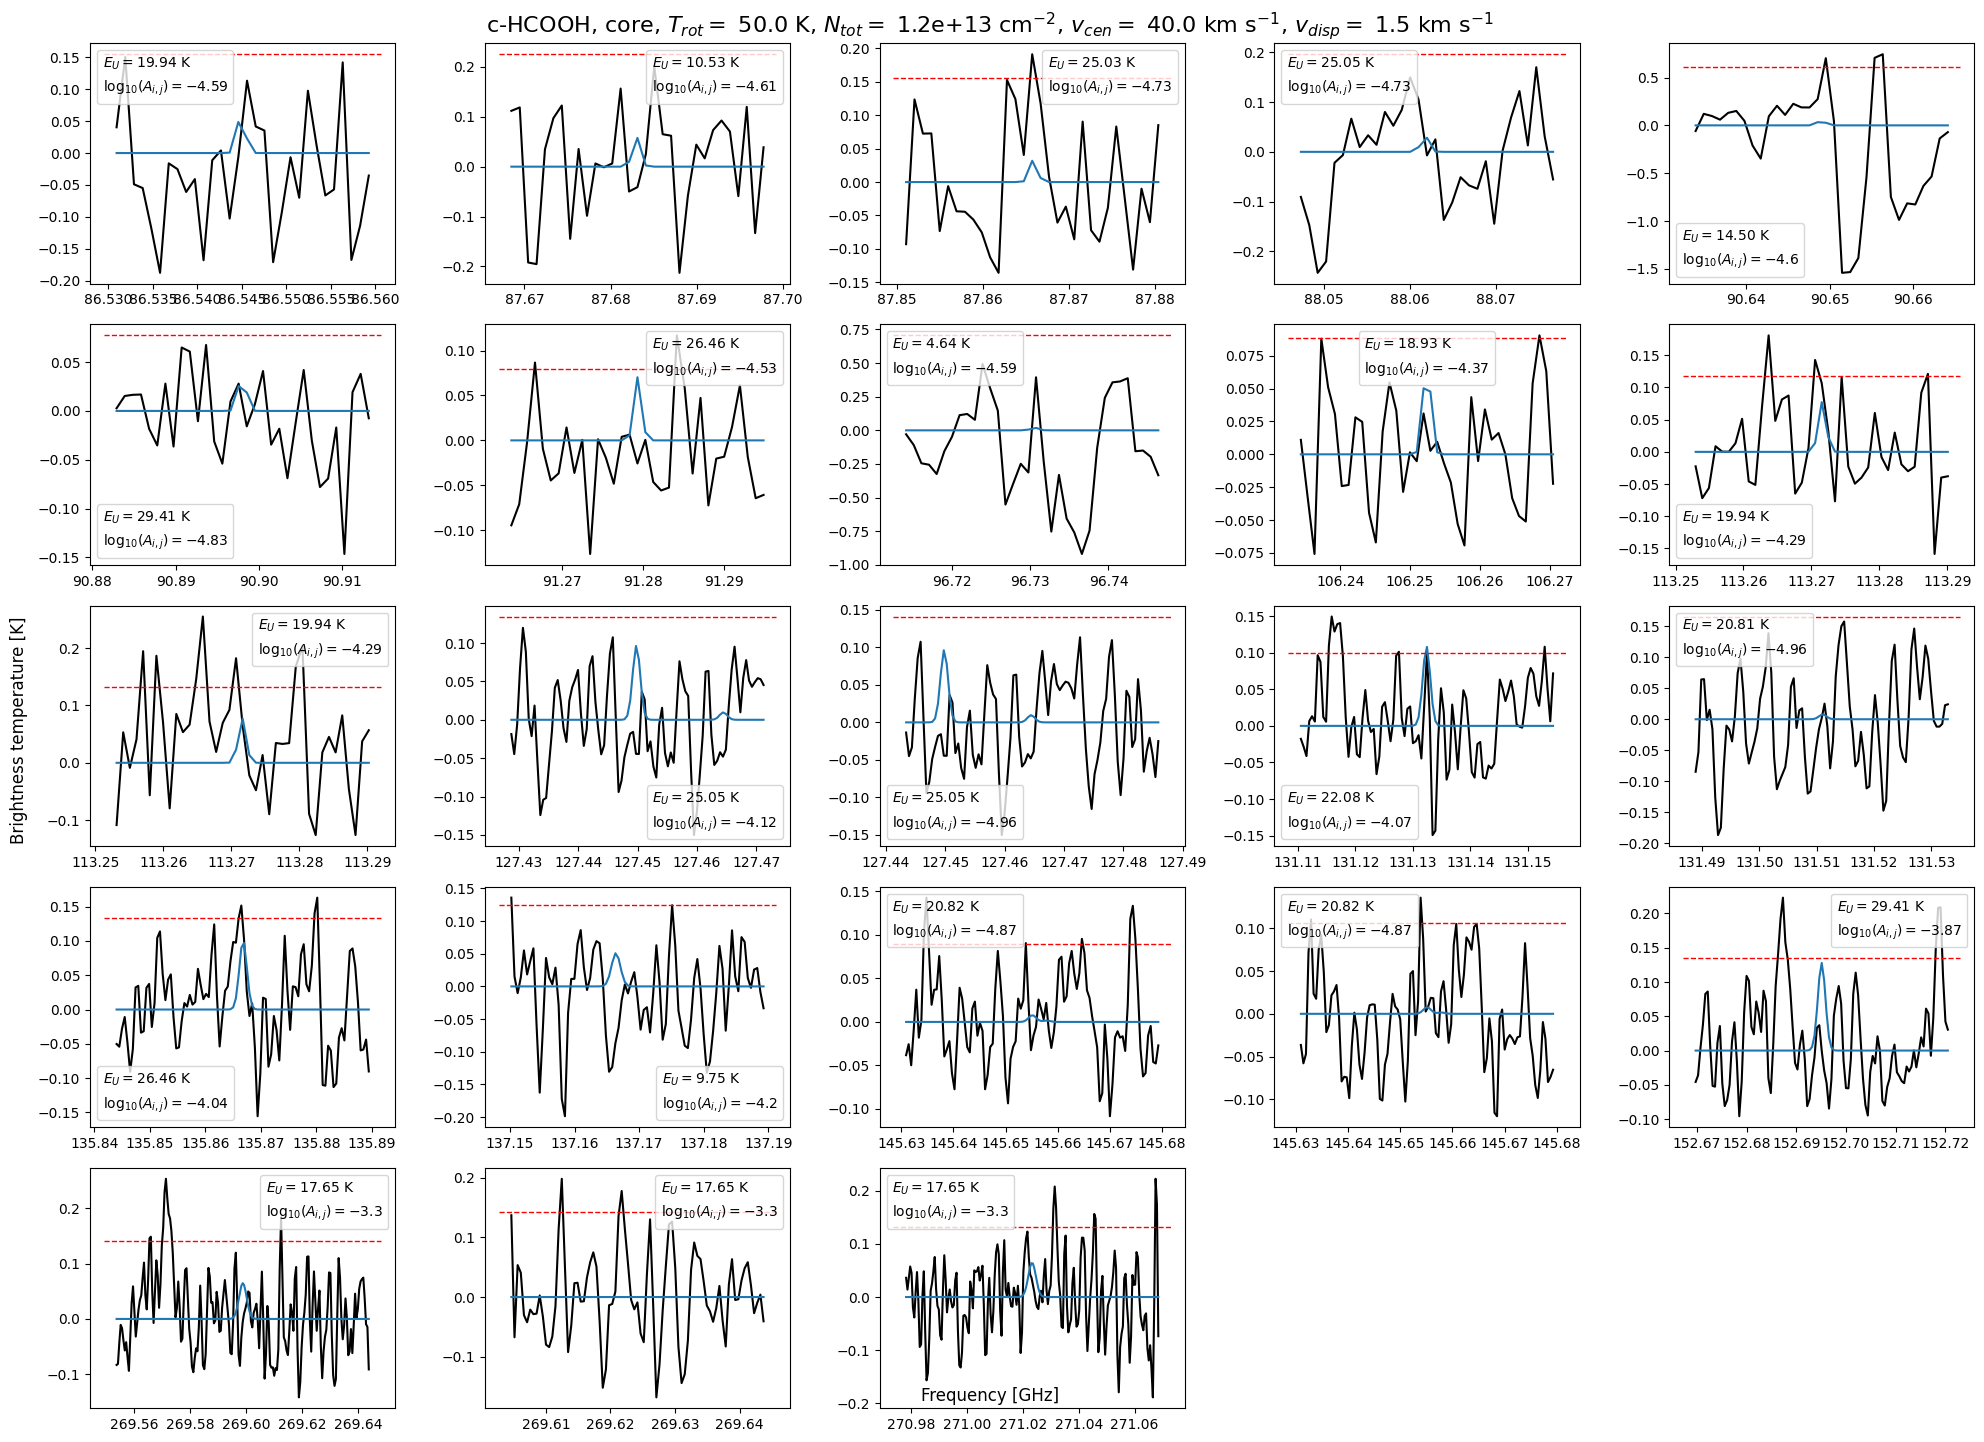

In [20]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 50., N_tot = 1.2e+13, v_cen = 40.*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=20, fig_height=15, 
               nrows=5, ncols=5, parse_loc=False, line_by_line=True, name_for_plot=f'c-HCOOH', extr_type="coord", 
               crd=crd, show_2_sigma=True, EU_cutoff_K=30)

In [22]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False)

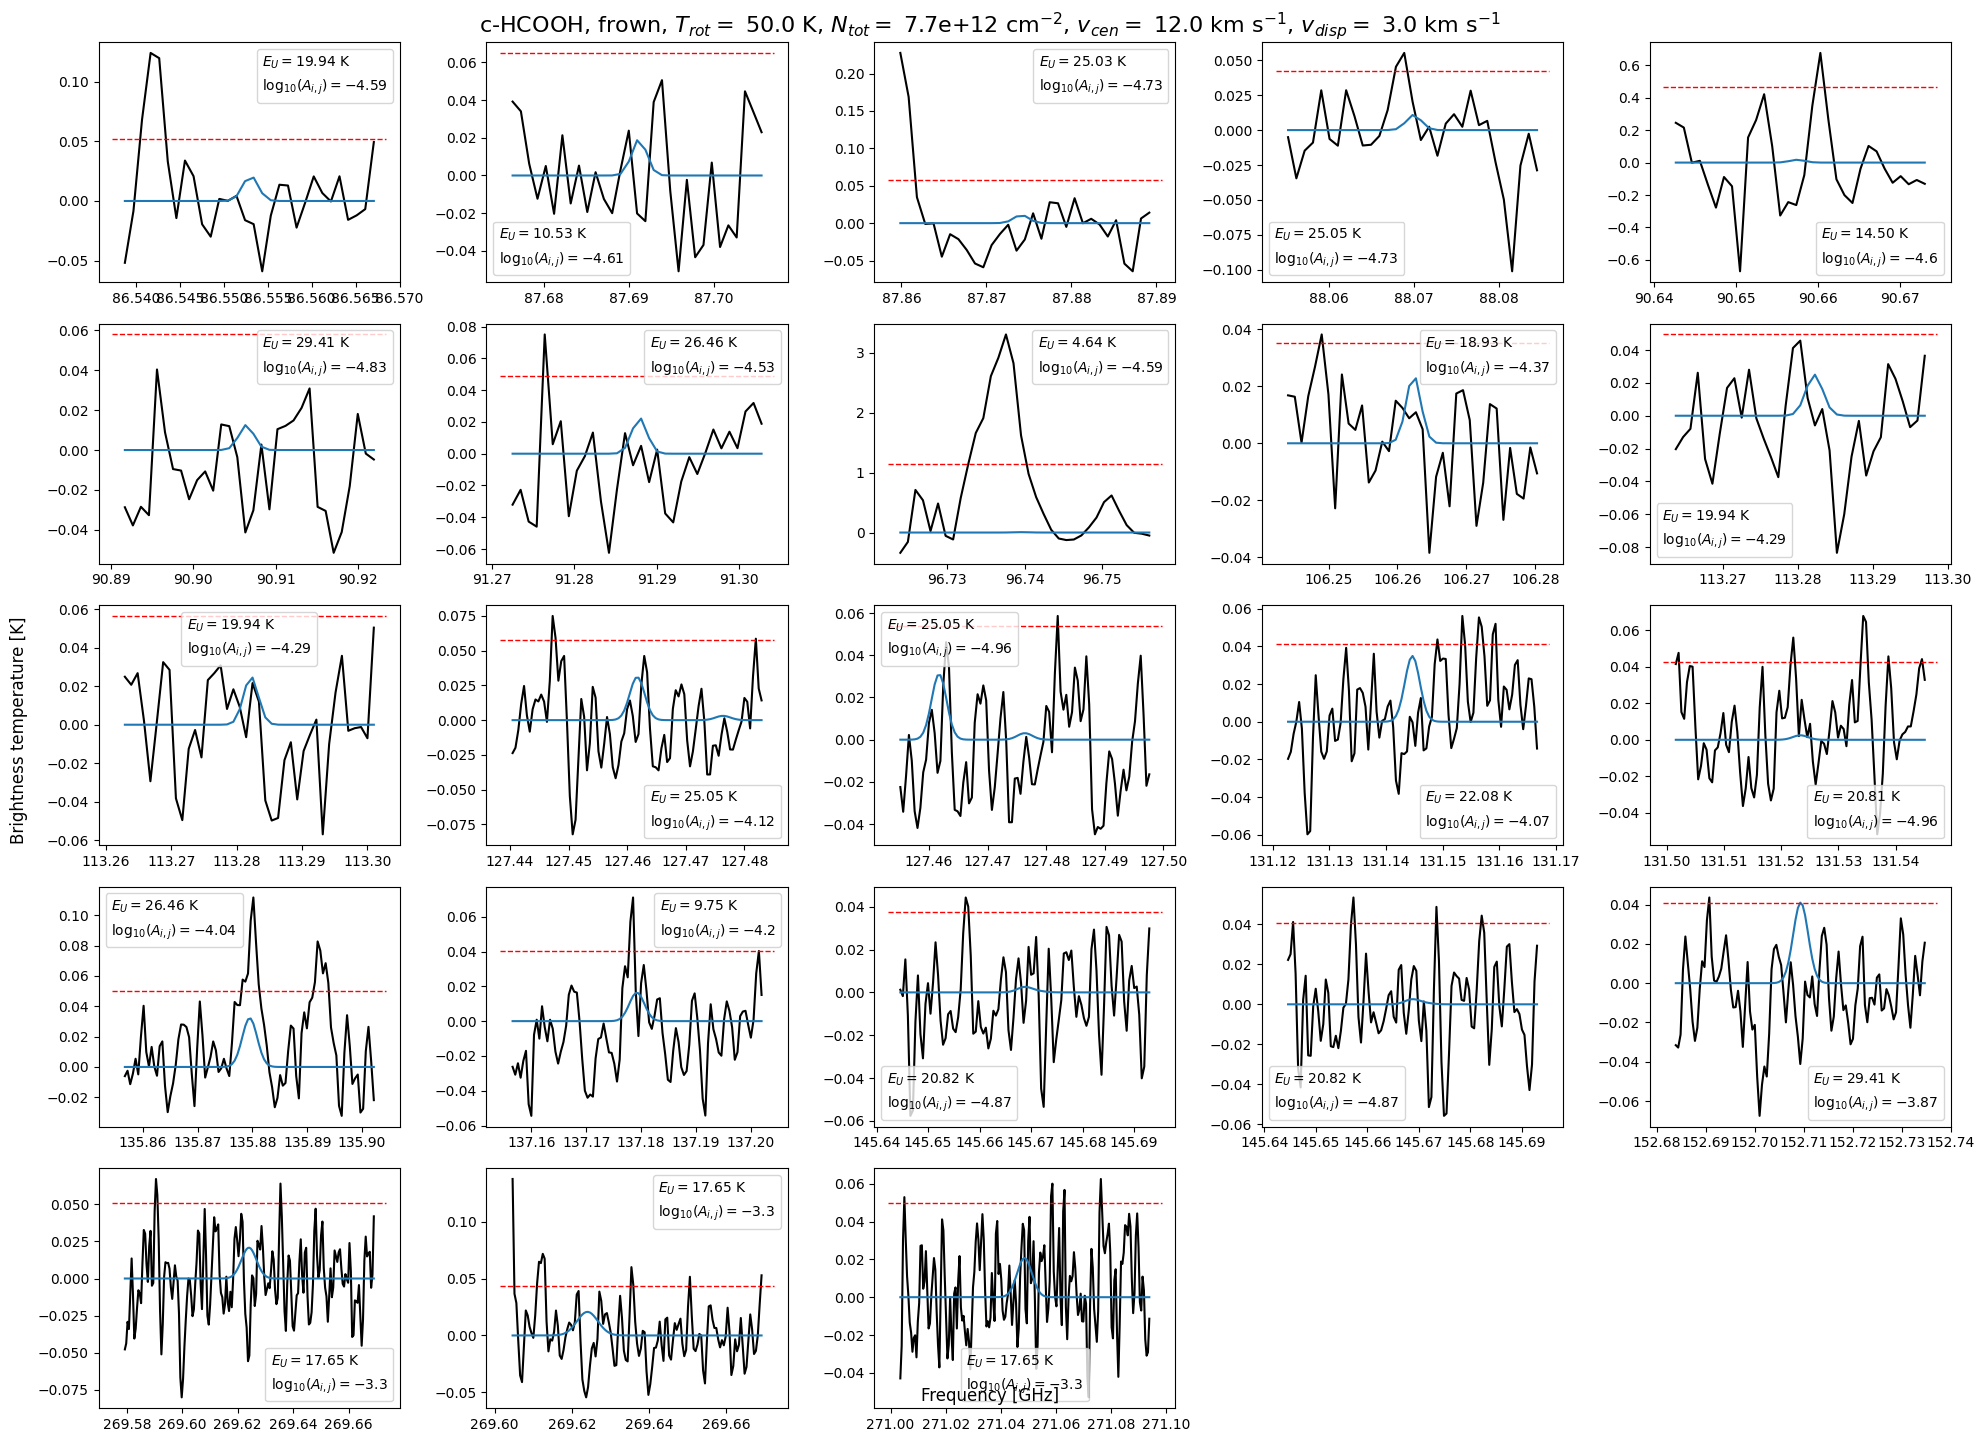

In [40]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 50., N_tot = 7.7e+12, v_cen = 12.*u.km/u.s, v_disp = 3.*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=20, fig_height=15, 
                       nrows=5, ncols=5, parse_loc=False, ret_tbl=False, line_by_line=True, name_for_plot=f'c-HCOOH', extr_type="reg", 
                       just_data=False, return_freqs=True, show_2_sigma=True, EU_cutoff_K=30)

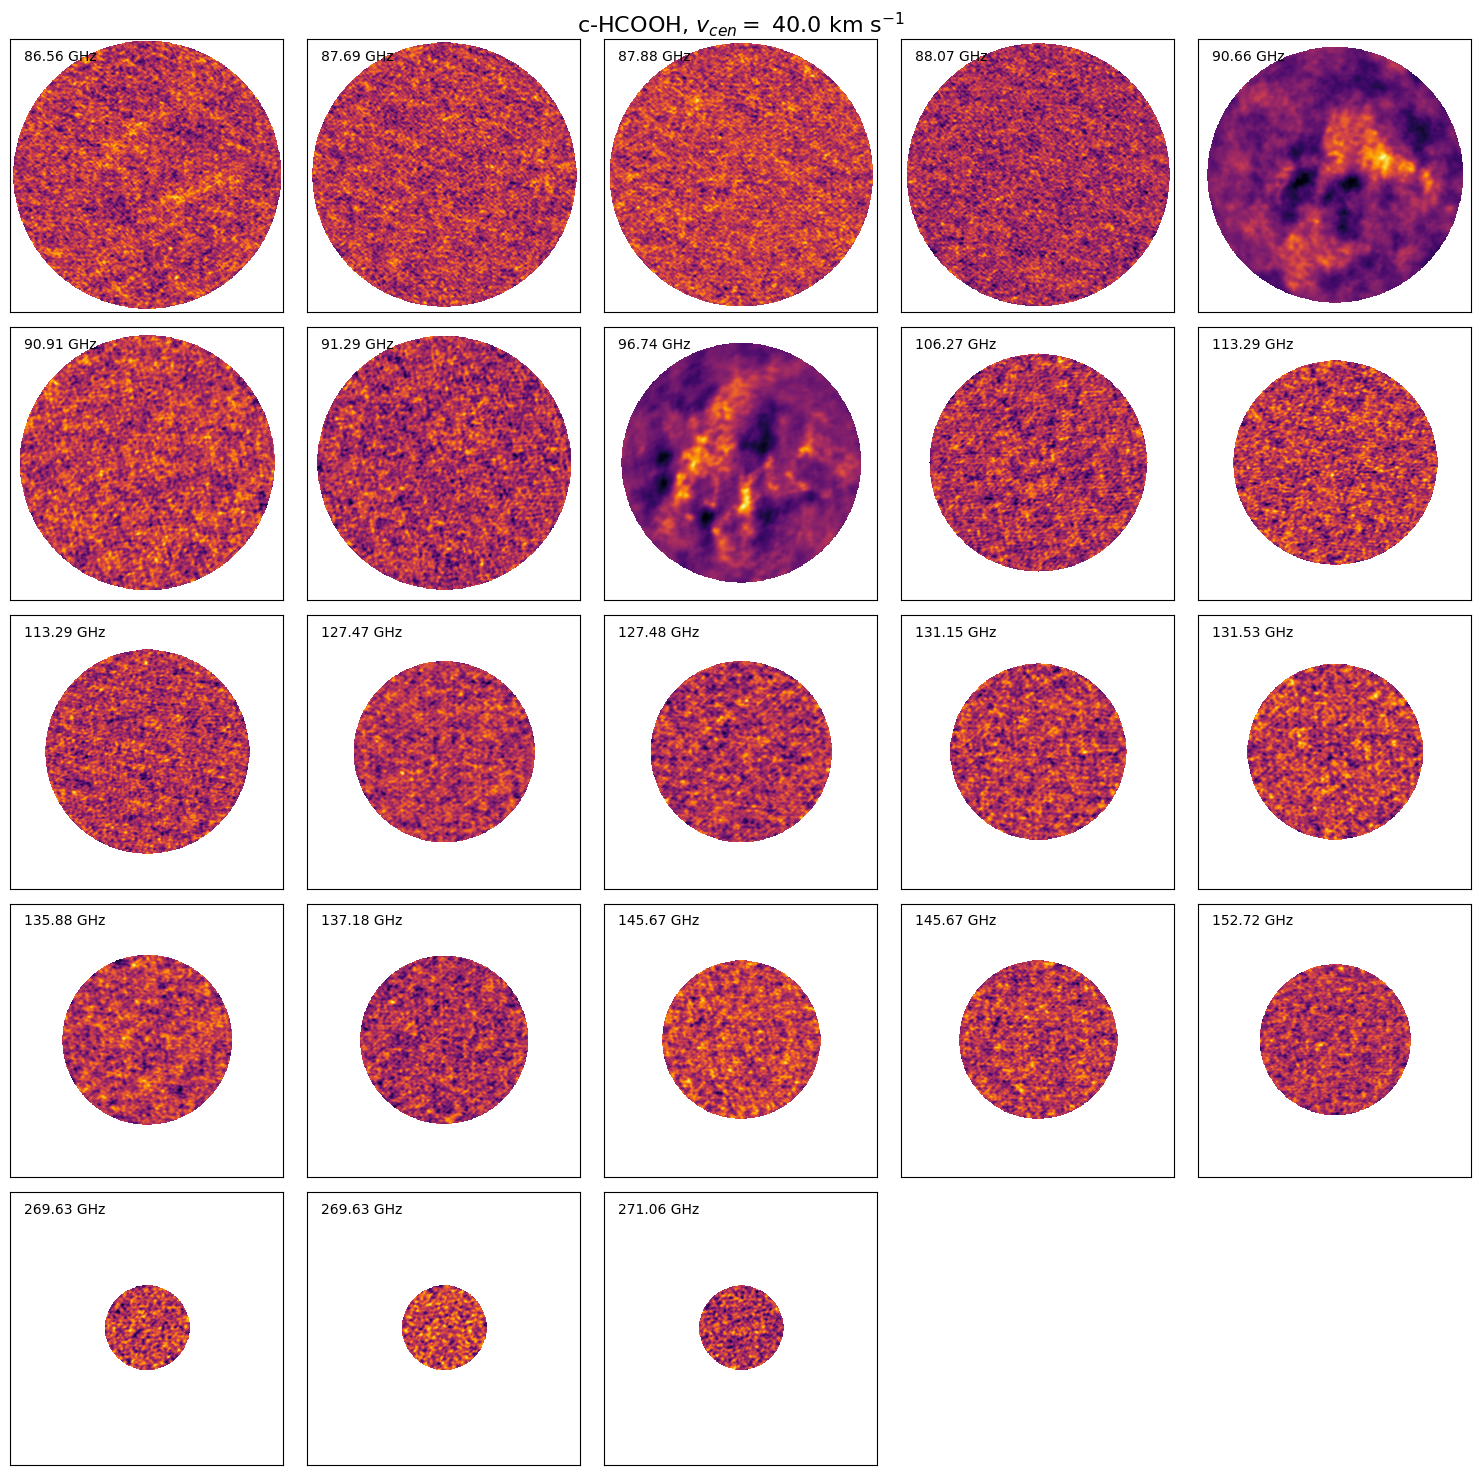

In [34]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=40*u.km/u.s, fig_width=15, fig_height=15, nrows=5, ncols=5, name_for_plot=f'c-HCOOH')

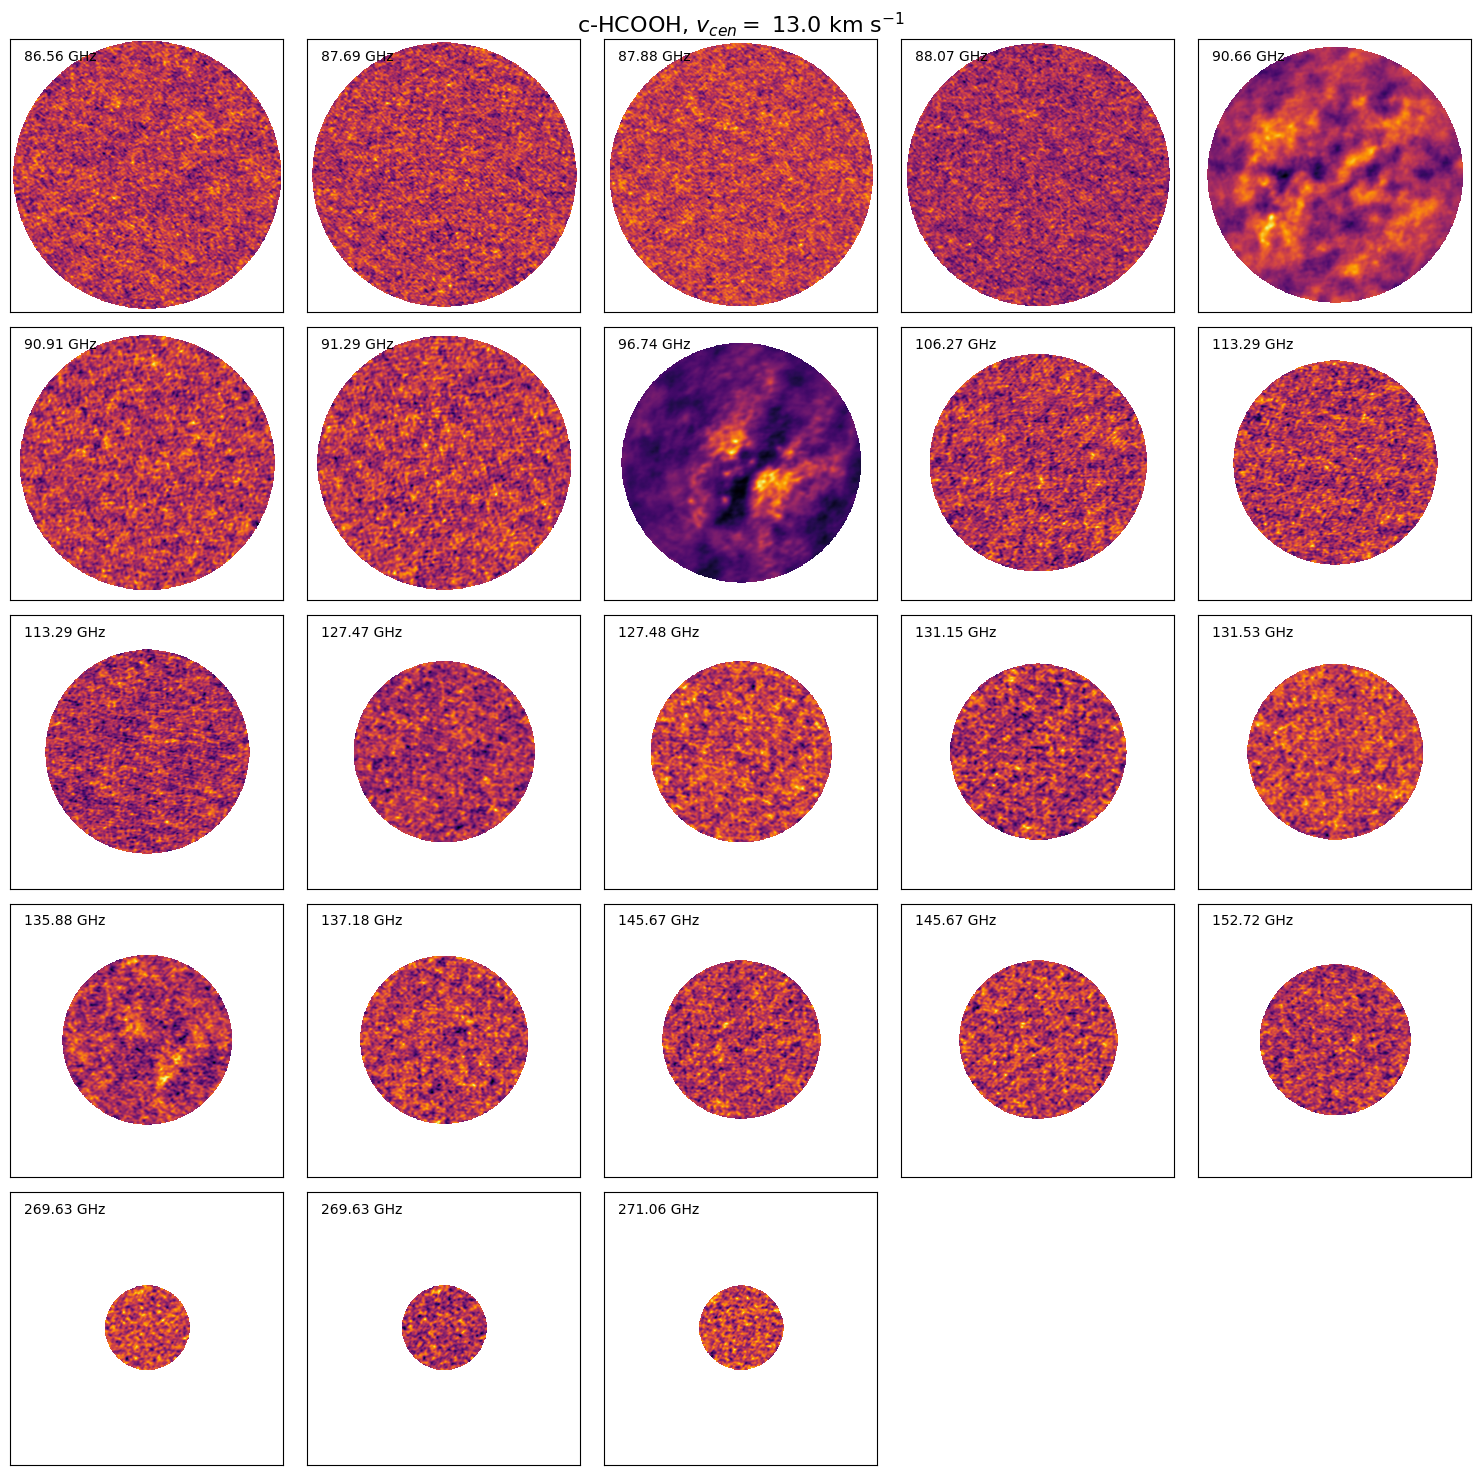

In [35]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=13*u.km/u.s, fig_width=15, fig_height=15, nrows=5, ncols=5, name_for_plot=f'c-HCOOH')